In [4]:
import numpy as np
import random
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt

In [9]:
class KArmBandit:
    '''
    This class defines the k arm bandit RL problem    
    '''
    def __init__(self, k,armVar = 1,plotAction = False):
        #Number of Arm
        self.k = k
        #Distribution of each arm
        '''
        have to keep the inital distribution of each arm equal
        '''
        self.armDist = np.full(k, np.random.randn())
        self.armVar = armVar
        self.bstArmVal = np.max(self.armDist)
        self.bstArm = np.argmax(self.armDist)
        if plotAction:
            self.plotActionDistribution()
        self.q = self.initializeArm()
        self.armSelectCount = np.zeros(self.k)
    
    def initializeArm(self):
        # To initialize the q values
        return np.zeros(self.k)
    
    def plotActionDistribution(self):
        '''
        Method to generate the violen plot
        '''
        # Generete the plot for arm distribution
        var = np.ones((1,self.k))
        data = np.random.randn(2000, self.k) * var + self.armDist
        plt.figure(figsize=(10,6))
        plt.violinplot(data,showmeans = True,showextrema=True)
        plt.xlabel('Action')
        plt.ylabel('Reward distribution')
        plt.grid(True)
        plt.show()
        
    def updateQ(self,arm,alpha):
        '''
        Method to update the estimate the action-values of each arm
        if alpha = -1 we are doing estimate by sample mean
        if alpha = some +ve const value  that we use that value
        '''
        if alpha == -1:
            self.armSelectCount[arm] +=1
            alpha = (1/self.armSelectCount[arm])
        #sample reward from the arm
        rt = np.random.normal(loc = self.armDist[arm],scale = self.armVar)
        self.q[arm] = self.q[arm] + alpha*(rt - self.q[arm])
        return rt
    
    def selectArm(self,epsilon):
        '''
        Method to slect a arm with Epsilon greed policy
        '''
        if random.random()<epsilon: 
            selectedArm = np.random.randint(self.k)
        else : 
            selectedArm = np.argmax(self.q)
        return selectedArm
    
    def updateQTrue(self):
        '''
        Method to change the True distribution of each arm by adding a normally distributed 
        increment with mean zero and standard deviation 0.01 to all the arm
        '''
        randomvalues = np.random.normal(loc = 0,scale = 0.01,size = self.k)
        self.armDist += randomvalues
        self.bstArmVal = np.max(self.armDist)
        self.bstArm = np.argmax(self.armDist)

In [14]:
k= 10
timestep = 10000
rewardWithEpsilon = dict()
pctOptimalAction = dict()
errWithEpsilon = dict()
epsilon = [0.1]
for ep in epsilon:
    rwdPerTimeStep = np.zeros(timestep);
    pctOptActTimeStep = np.zeros(timestep);
    errPerTimeStep = np.zeros((timestep,k));
    #Run 2K individual bandit problem
    for i in tqdm(range(1,2001)):
        karmBandit = KArmBandit(k, 1 , False)
        # run timestep time step of rach problem 
        for j in range(0,timestep):
            arm = karmBandit.selectArm(ep)
            reward = karmBandit.updateQ(arm,alpha = 0.1)
            rwdPerTimeStep[j] += reward
            if arm == karmBandit.bstArm:
                pctOptActTimeStep[j] += 1
            errPerTimeStep[j] += abs(karmBandit.q-karmBandit.armDist)
            # Update the original arm distribution
            karmBandit.updateQTrue()
    rwdPerTimeStep /= i
    pctOptActTimeStep = (pctOptActTimeStep/i) *100 
    errPerTimeStep = errPerTimeStep/i
    #filling dict of data
    rewardWithEpsilon[ep] = rwdPerTimeStep
    pctOptimalAction[ep] = pctOptActTimeStep
    errWithEpsilon[ep] = errPerTimeStep

In [12]:
reward01 = rewardWithEpsilon[0.1]
optimal02 = pctOptimalAction[0.1]

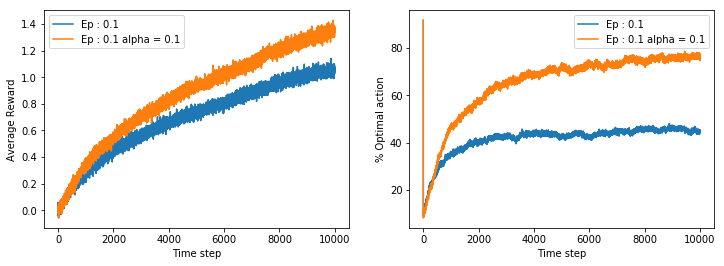

In [16]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(12,4))

#ax1.plot(errWithEpsilon[epsilon[plti]][:,ki], label='Arm'+str(ki+1))
# ax1.plot(rewardWithEpsilon[0.0], label='Ep : 0.0(greedy)')
ax1.plot(reward01, label='Ep : 0.1')
ax1.plot(rewardWithEpsilon[0.1],label='Ep : 0.1 alpha = 0.1')
ax1.legend()
ax1.set(xlabel='Time step', ylabel='Average Reward')

# ax2.plot(pctOptimalAction[0.0], label='Ep : 0.0(greedy)')
ax2.plot(optimal02, label='Ep : 0.1')
ax2.plot(pctOptimalAction[0.1],label='Ep : 0.1 alpha = 0.1')
ax2.legend()
ax2.set(xlabel='Time step', ylabel='% Optimal action')

plt.show()

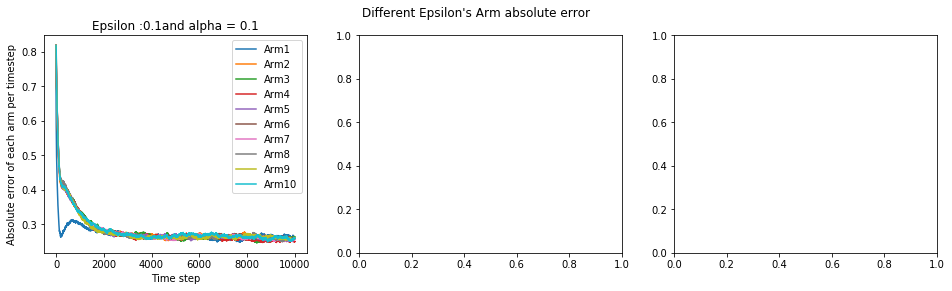

In [18]:
fig, ax = plt.subplots(1, 3,figsize=(16,4))
fig.suptitle('Different Epsilon\'s Arm absolute error')

for plti in range(1):
    for ki in range(k):
        ax[plti].plot(errWithEpsilon[epsilon[plti]][:,ki], label='Arm'+str(ki+1))
    ax[plti].legend(loc="upper right")
    ax[plti].set_title('Epsilon :' + str(epsilon[plti]) + 'and alpha = 0.1' )
    ax[plti].set(xlabel='Time step', ylabel='Absolute error of each arm per timestep')
    ax[plti].label_outer()
plt.show()

In [150]:
# plt.figure(figsize=(8,6))
# plt.plot(rewardWithEpsilon[0.0], label='Ep : 0.0(greedy)')
# plt.plot(rewardWithEpsilon[0.01],label='Ep : 0.01')
# plt.plot(rewardWithEpsilon[0.1], label='Ep : 0.1')
# plt.xlabel('Time step')
# plt.ylabel('Average Reward')
# plt.yticks(np.arange(0, 1.8, step=0.4))
# plt.legend()
# plt.show()

# plt.figure(figsize=(8,5))
# plt.plot(pctOptimalAction[0.0], label='Ep : 0.0(greedy)')
# plt.plot(pctOptimalAction[0.01],label='Ep : 0.01')
# plt.plot(pctOptimalAction[0.1], label='Ep : 0.1')
# plt.xlabel('Time step')
# plt.ylabel('Average Reward')
# plt.yticks(np.arange(0, 100, step=20))
# plt.legend()
# plt.show()

In [2]:
np.random.randn()

-0.616685352689195

In [3]:
np.full(10, 7)

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7])